In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("spam.csv",encoding='latin-1')
df

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN
...,...,...,...,...,...
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN


In [3]:
df.drop(['Unnamed: 2','Unnamed: 3','Unnamed: 4'],axis=1,inplace=True)

In [4]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [5]:
df.shape

(5572, 2)

In [6]:
df = df.rename(columns={'v1':'Category','v2':'message'})

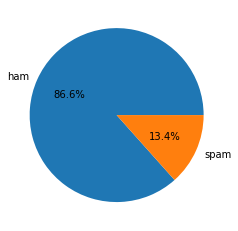

In [7]:
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct='%0.1f%%')
plt.show()

In [8]:
df.loc[df['Category']=='spam','Category',]=0
df.loc[df['Category']=='ham','Category',]=1

In [9]:
df.head()

,Category,message
0,1,"Go until jurong point, crazy.. Available only ..."
1,1,Ok lar... Joking wif u oni...
2,0,Free entry in 2 a wkly comp to win FA Cup fina...
3,1,U dun say so early hor... U c already then say...
4,1,"Nah I don't think he goes to usf, he lives aro..."


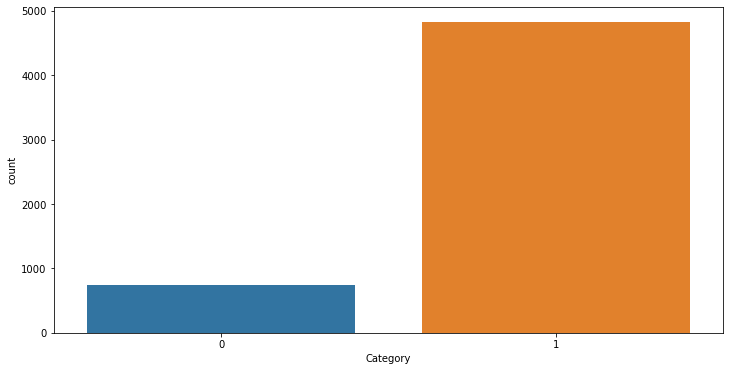

In [10]:
plt.figure(figsize=(12,6))
sns.countplot(df['Category'])
plt.show()

In [11]:
x= df['message']
x

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: message, Length: 5572, dtype: object

In [12]:
y = df['Category']
y

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y, test_size=0.2, random_state=1)

In [15]:
print(x.shape)
print(xtrain.shape)
print(xtest.shape)

(5572,)
(4457,)
(1115,)


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df = 1, stop_words='english', lowercase='True')

xtrain_features = feature_extraction.fit_transform(xtrain)
xtest_features = feature_extraction.transform(xtest)

# convert Y_train and Y_test values as integers

ytrain = ytrain.astype('int')
ytest = ytest.astype('int')

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [19]:
lr = LogisticRegression()

In [20]:
lr.fit(xtrain_features, ytrain)
ypred = lr.predict(xtrain_features)

acc = accuracy_score(ytrain,ypred)

In [21]:
print('Accuracy on training data : ', acc)

Accuracy on training data :  0.9670181736594121


In [22]:
ypred = lr.predict(xtest_features)

acc = accuracy_score(ytest,ypred)

In [23]:
print('Accuracy on testing data : ', acc)

Accuracy on testing data :  0.9775784753363229


In [24]:
Message = ['Ok lar... Joking wif u oni...']

# convert text to feature vectors
input_data_features = feature_extraction.transform(Message)

# making prediction

prediction = lr.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


In [25]:
df['message'][1]

'Ok lar... Joking wif u oni...'